# <span style="color:#336699">Python Sample Client [<img src="../img/bdc-logo.png" alt="Brazil Data Cube - Python Sample Client" style="height:100px;" align="right">](https://github.com/brazil-data-cube/sample.py)</span>



<hr style="border:2px solid #0077b9;">

# <span style="color:#336699"> Example of using sample.py</span> 

###  Import the required libraries 
<hr style="border:1px solid #0077b9;">

In [1]:
import sample
from matplotlib import pyplot as plt

#### After that, you can check the installed version of sample package:

In [2]:
sample.__version__

'0.2.0'

###  Create sample object
<hr style="border:1px solid #0077b9;">

#### Defines the user and password to connect WFS SAMPLE

In [26]:
auth = ("user", "password")

#### Create sample object by passing the WFS URL and the user if exists

In [27]:
s = sample.sample(wfs="http://brazildatacube.dpi.inpe.br/bdc/geoserver", auth=auth)

###  Sample operations - Dataset
<hr style="border:1px solid #0077b9;">

#### Retrive the datasets avaliable in SAMPLE WFS

In [5]:
s.datasets

['BDC Sample Dataset - Goias Test Area',
 'Amostras Campo Verde MT (Campo Verde Database)',
 'Insitu Mato Grosso State (Brazil) Land Use and Land Cover Samples 1.8K',
 'Insitu Mato Grosso State (Brazil) Land Use and Land Cover Samples 2K',
 'BDC Sample Dataset - Mato Grosso Test Area',
 'BDC Sample Dataset - Test Area',
 'BDC Sample Dataset - Bahia Test Area',
 'BDC Sample Dataset - Bahia Test Area 2',
 'BDC Sample Dataset 2 - Test Area',
 'TerraClass Brasilia Barreiras 2018',
 'TerraClass Goiania Mineiros 2018',
 'TerraClass Minas Gerais 2018',
 'TerraClass Palmas Balsas 2018',
 'TerraClass Cerrado 2018']

#### Get a dataset given a dataset name

In [6]:
s.dataset('BDC Sample Dataset - Test Area')

{'created_at': '2020-04-17T13:37:53.016Z',
 'updated_at': '2020-04-17T13:37:53.016Z',
 'id': 6,
 'name': 'BDC Sample Dataset - Test Area',
 'start_date': '2018-09-01Z',
 'end_date': '2019-08-31Z',
 'observation_table_name': 'area_bdc_all_observations',
 'midias_table_name': None,
 'version': '1',
 'description': 'Brazil Data Cube samples of study areas',
 'classification_system_name': 'BDC',
 'user_name': 'Fabiana Zioti',
 'collect_method': 'VISUAL'}

#### Returns the dataset metadata given a dataset name

In [7]:
s.dataset('BDC Sample Dataset - Test Area').metadata

{'id': 'test_sites_bdc',
 'dates': [{'date': '2019', 'dateType': 'Issued'}],
 'rightsList': [{'rightsUri': 'https://creativecommons.org/licenses/by/4.0/',
   'rights': 'Creative Commons Attribution 4.0 International'}],
 'version': '1.0',
 'contributors': [{'@type': 'Person',
   'givenName': 'Michelle',
   'familyName': 'Picoli'},
  {'@type': 'Person', 'givenName': 'Rolf', 'familyName': 'Simoes'},
  {'@type': 'Person', 'givenName': 'Michel', 'familyName': 'Chaves'}],
 'types': {'resourceTypeGeneral': 'Dataset',
  'resourceType': 'Dataset',
  'schemaOrg': 'Dataset',
  'citeproc': 'dataset',
  'ris': 'DATA',
  'bibtex': 'misc'},
 'agency': 'INPE',
 'sizes': [],
 'state': 'findable',
 'descriptions': [{'description': 'This dataset include samples for the three test sites used by the Brazilian Data Cube project.',
   'descriptionType': 'Abstract',
   'lang': 'en'}],
 'titles': [{'title': 'Brazil Data Cube samples of study areas',
   'lang': 'en'}],
 'creators': [{'@type': 'Person',
   'giv

###  Sample operations - Observations
<hr style="border:1px solid #0077b9;">

#### Returns a observation geodataframe of a dataset

In [8]:
bdc_obs = s.dataset('BDC Sample Dataset - Test Area').observation

In [9]:
bdc_obs.head()

,location,id,start_date,end_date,collection_date,user_name,class_name
0,POINT (-53.98930 -16.90490),1,2018-09-01Z,2019-08-31Z,None,Fabiana Zioti,Agriculture
1,POINT (-53.71140 -16.70280),2,2018-09-01Z,2019-08-31Z,None,Fabiana Zioti,Agriculture
2,POINT (-53.45550 -16.22080),3,2018-09-01Z,2019-08-31Z,None,Fabiana Zioti,Agriculture
3,POINT (-54.59790 -17.31970),4,2018-09-01Z,2019-08-31Z,None,Fabiana Zioti,Agriculture
4,POINT (-54.49360 -17.28870),5,2018-09-01Z,2019-08-31Z,None,Fabiana Zioti,Agriculture


#### Plot BDC Sample Dataset - Test Area Observations

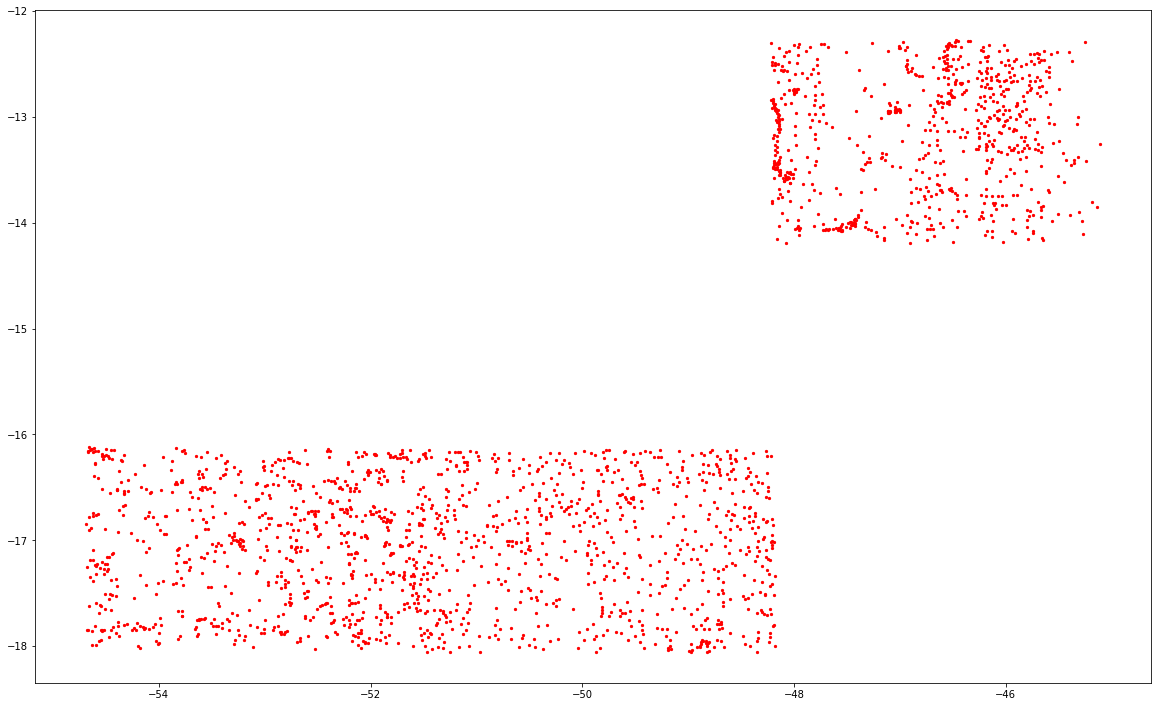

In [10]:
bdc_obs.plot( marker='o', color='red', markersize=5, figsize=(20, 20));

#### Unique Classes of BDC Sample Dataset - Test Area

In [11]:
bdc_obs.class_name.unique()

array(['Agriculture', 'Natural', 'Pasture', 'Bare Soil', 'Water Bodies'],
      dtype=object)

#### CRS information

In [12]:
bdc_obs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

###  SampleDB with IBGE data
<hr style="border:1px solid #0077b9;">

#### After retrieving observation you can use any Python library to perform data processing. In this section we show how to use GeoPandas to load and use others data.

#### Import geopandas library :

In [15]:
import geopandas as gpd

#### You can define a file to import. In this example we use the read_file() to open a shapefile. Those data can be found in [unidades_da_federacao](http://servicodados.ibge.gov.br/Download/Download.ashx?u=geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2017/Brasil/BR/br_unidades_da_federacao.zip) and [Biomas_250mil](ftp://geoftp.ibge.gov.br/informacoes_ambientais/estudos_ambientais/biomas/vetores/Biomas_250mil.zip)

In [25]:
file_path_biomas = "file_path/Biomas_250mil"
file_path_uf = "file_path/br_unidades_da_federacao"

In [17]:
biomas = gpd.read_file(file_path_biomas, encoding="utf-8")

In [18]:
uf = gpd.read_file(file_path_uf, encoding="utf-8")

#### Geodataframe with the federative units of Brazil 

In [19]:
uf.head()

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry
0,ACRE,NORTE,12,"POLYGON ((-73.18253 -7.33550, -73.05413 -7.381..."
1,ALAGOAS,NORDESTE,27,"POLYGON ((-35.46753 -8.81744, -35.46659 -8.817..."
2,AMAPÁ,NORTE,16,"MULTIPOLYGON (((-50.18123 1.90099, -50.17688 1..."
3,AMAZONAS,NORTE,13,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125..."
4,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-38.65484 -18.04242, -38.65819..."


#### Geodataframe with biomes from Brazil

In [20]:
biomas.head()

,Bioma,CD_Bioma,geometry
0,Amazônia,1,"MULTIPOLYGON (((-44.08515 -2.41669, -44.08560 ..."
1,Caatinga,2,"POLYGON ((-41.74080 -2.80826, -41.73673 -2.809..."
2,Cerrado,3,"POLYGON ((-43.39009 -2.33937, -43.38741 -2.342..."
3,Mata Atlântica,4,"MULTIPOLYGON (((-48.70814 -28.44851, -48.70994..."
4,Pampa,5,"POLYGON ((-52.82472 -27.46295, -52.81558 -27.4..."


#### CRS Information

In [21]:
biomas.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - SIRGAS 2000 by country
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [22]:
uf.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - SIRGAS 2000 by country
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

###  Visualização de dados geográficos com GeoPandas
<hr style="border:1px solid #0077b9;">

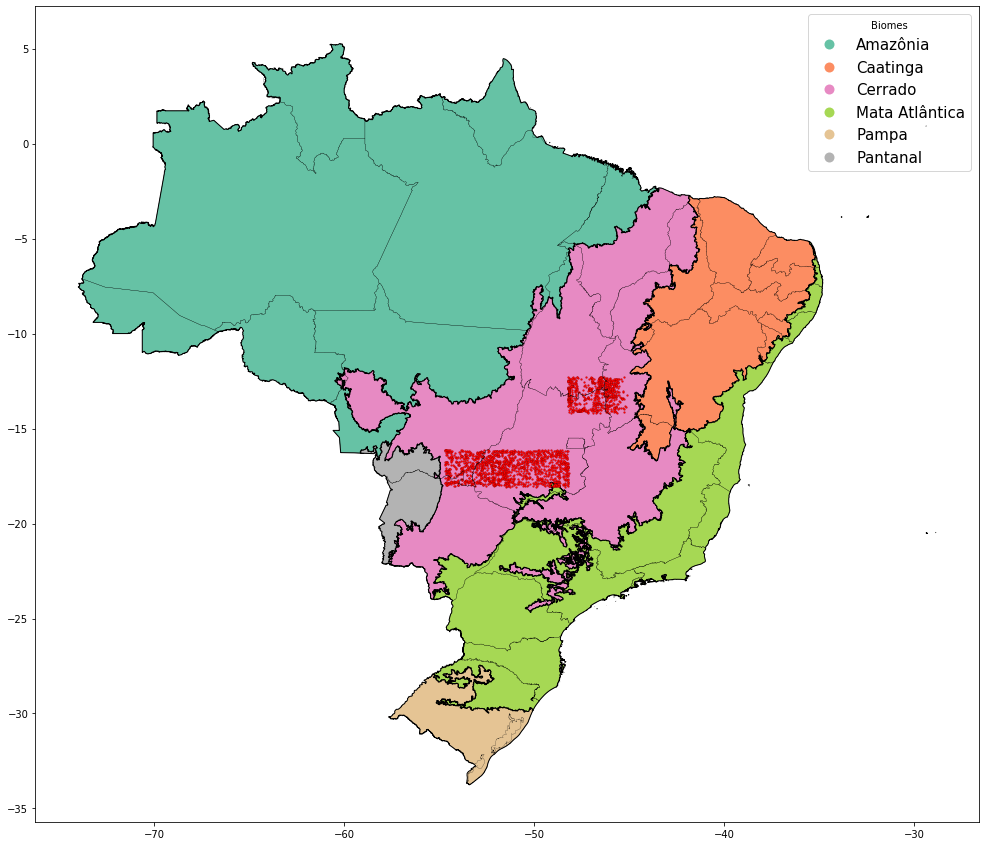

In [23]:
fig, ax = plt.subplots(figsize=(20,15))

# ax.set_aspect('equal')

biomas.plot(ax=ax, cmap='Set2', column='Bioma',edgecolor='black', legend=True,legend_kwds={'title': "Biomes", 'fontsize': 15})

uf.geometry.boundary.plot(ax=ax, color=None, edgecolor='black',linewidth = 0.2)

bdc_obs.plot(ax=ax, marker='o', color='red', markersize=4, edgecolor='black', linewidth = 0.1);

###  Sample - Save observation data
<hr style="border:1px solid #0077b9;">

#### Save a dataset observation to a shapefile

In [39]:
bdc_obs.to_file("my_save_bdc_obs.shp",  encoding="utf-8")